# **CAR PRICE PREDICTION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/DataThinkers/Datasets/refs/heads/main/DS/car%20data.xls')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.shape

(301, 9)

In [6]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#from import datetime
date_time=datetime.datetime.now()

In [10]:
data['Age']=date_time.year-data['Year']

In [11]:
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7


In [12]:
data.drop(columns=['Year'],axis=1,inplace=True)

In [13]:
data.head(3)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7


<Axes: ylabel='Selling_Price'>

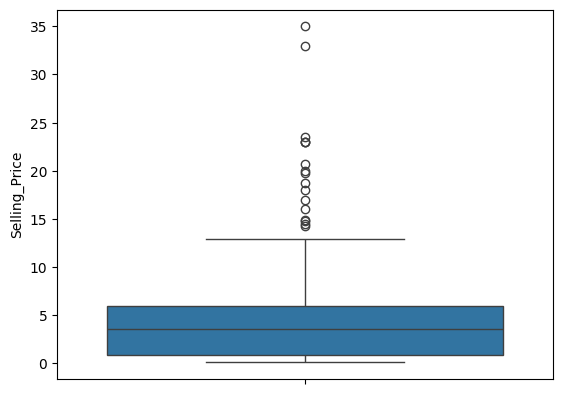

In [14]:
sns.boxplot(data['Selling_Price'])

In [15]:
#removing last 2 outliers
data['Selling_Price'].sort_values(ascending=False).head(3)

,Selling_Price
86,35.0
64,33.0
63,23.5


In [16]:
data= data[~(data['Selling_Price'] >=33.0) & (data['Selling_Price']<=35.0)]

In [17]:
data.shape

(299, 9)

In [18]:
#Use map for binary or ordinal values(ordered categories)
#Use pd.get_dummies() when data is nominal(no orer of categories) .It creates seperate col for each cat.

Here we will use map as the categories are less.

In [19]:
data.head(3)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7


In [20]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [21]:
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [22]:
data['Fuel_Type'].unique()

array([0, 1, 2])

In [23]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [24]:
data['Seller_Type']=data['Seller_Type'].map({'Dealer':0,'Individual': 1})

In [25]:
data['Seller_Type'].unique()

array([0, 1])

In [26]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [27]:
data['Transmission'] =data['Transmission'].map({'Manual':0,'Automatic':1})

In [28]:
data['Transmission'].unique()

array([0, 1])

In [29]:
data.head(3)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7


**Split the data into Training Set And Test Set**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=data.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [34]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10


In [35]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [36]:
#Without random state ,everytime train-test split is run it will be different. For consistent value random state is set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
train_data= X_train.join(y_train)

<Axes: >

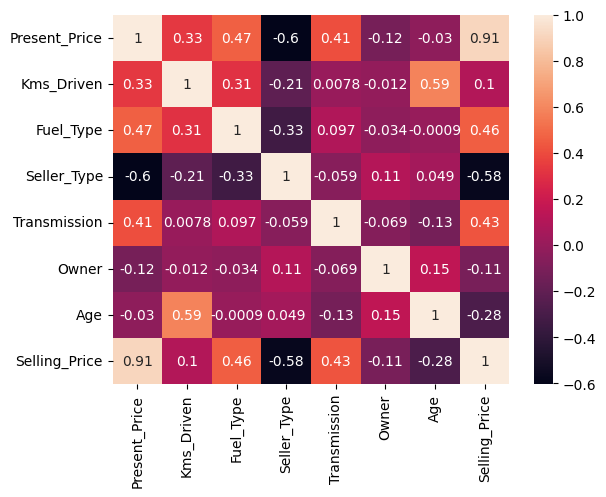

In [38]:
sns.heatmap(train_data.corr(), annot=True)

**Import models**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
L=LinearRegression()
L.fit(X_train,y_train)

RF=RandomForestRegressor()
RF.fit(X_train,y_train)

XGB=GradientBoostingRegressor()
XGB.fit(X_train,y_train)

GradientBoostingRegressor()

In [44]:
L.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred1=L.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=XGB.predict(X_test)

Evaluate model performance

In [46]:
from sklearn import metrics

In [47]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)

In [48]:
print(score1,score2,score3)

0.6790884983129405 0.7430027837810238 0.8697601478604391


In [49]:
final=pd.DataFrame({'Models':['Linear Regression','Random Forest','Gradient Boosting Regressor'],'R2 Score':[score1,score2,score3]})

<Axes: xlabel='Models', ylabel='R2 Score'>

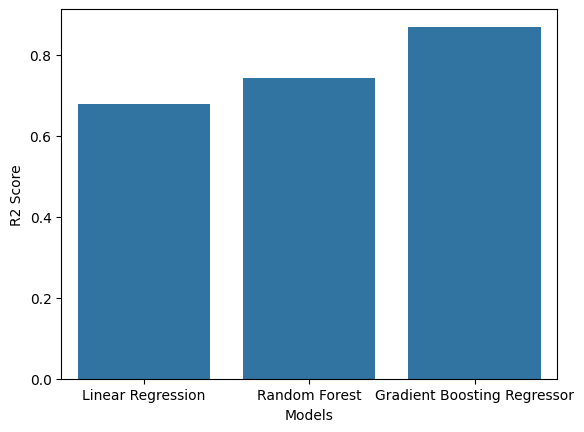

In [51]:
sns.barplot(x='Models',y='R2 Score',data=final)

**XBG with R2 score 88.6%**

In [53]:
xgb_final=XGB.fit(X,y)

In [58]:
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'Royal Enfield Thunder 500', 'UM Renegade Mojave',
       'KTM RC200', 'Bajaj Dominar 400', 'Royal Enfield Classic 350',
       'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350',
       'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', '

In [55]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [60]:
new_data=pd.DataFrame({
    'Present_Price':[5.59],
    'Kms_Driven':[27000],
    'Fuel_Type':[0],
    'Seller_Type':[0],
    'Transmission':[0],
    'Owner':[0],
    'Age':[8]
})

In [62]:
XGB.predict(new_data)

array([4.09649025])